In [1]:
import os
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import Image
import http
http.client.HTTPConnection.debuglevel = 1
import json
import requests

## Overview about the Analysis and the Dataset

Stellar and Celestial objects are always a source of intrigue to human-beings. Asteroids and Meteors often enter the earth's atmosphere but some meteorites end up landing on earth. When celestial objects like meteorites hit the earth, they are examined by space agencies and scientists to determine their chemical composition, properties and even the presence of extraterrestrial samples! The earliest recorded Meteorite landings was the Aegospotami meteorite that fell to the earth around 467 BC. The most recent landing was recorded in Texas as of February 2023. Read more about it <a href = 'https://www.cbsnews.com/news/meteor-mcallen-texas-identified-meteorite-nasa-fragment-found/'> here. </a>

In this article, we analyze the 'meteorite landing' public dataset published by NASA and recorded by the Meteoritical Society. The dataset can be downloaded as a .csv' file from the 'Downloads and Resources' section of the website - https://catalog.data.gov/dataset/meteorite-landings. The file that gets downloaded has the name 'Meteorite_Landings.csv'. Below is a snapshot of the dataset - 

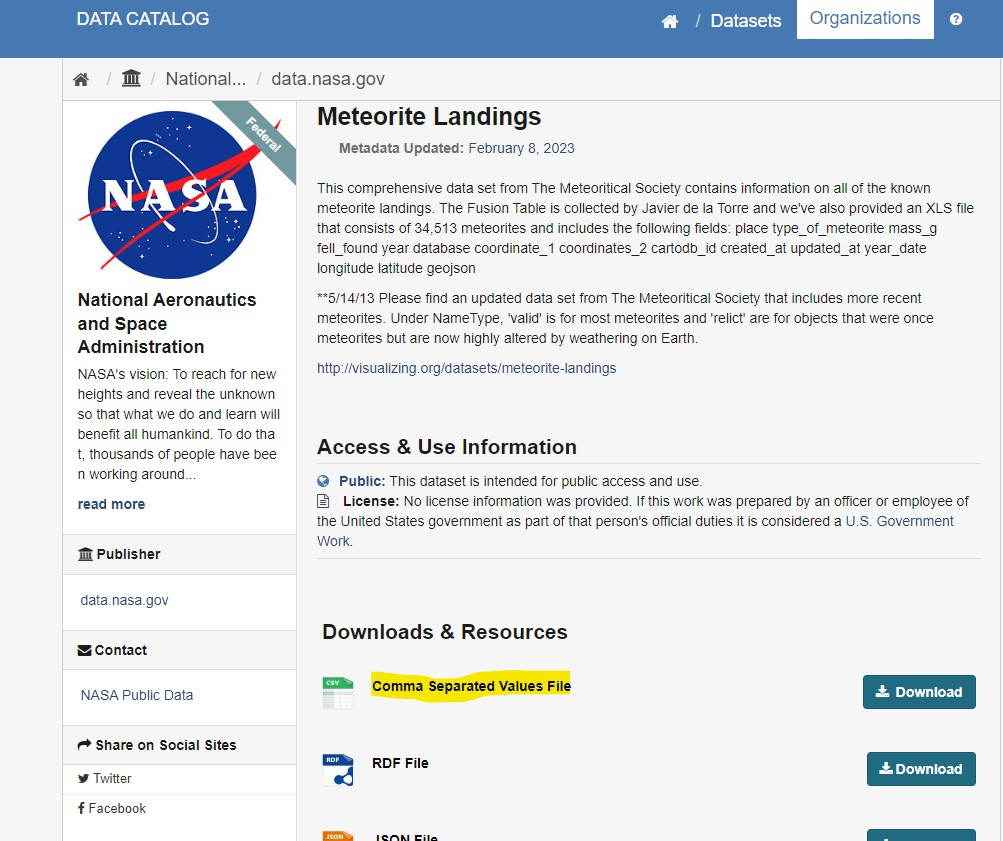

## Data Preparation

In [2]:
#read the dataset into a dataframe and rename the columns as needed
Meteorite_Landings = pd.read_csv('Meteorite_Landings.csv')
Meteorite_Landings.columns
Meteorite_Landings.rename({'mass (g)':'mass(g)'},inplace=True)

## About GridDB

We use GridDB to store the data and to query and visualize the results using SQL queries. GridDB supports 2 types of containers to store data namely a Collection and a Time Series Container. A 'Time Series' container is highly effective for data that has timestamps. Timeseries containers are used in applications that require a time-series analysis whereas a 'Collection' container can be used for data where the objective is to slice and dice data across dimensions, and to calculate metrics and associated visualizations. Read more about container types in this <a href = "https://griddb.net/en/blog/data-modeling-with-griddb/#:~:text=GridDB%20has%20two%20container%20types,timestamp%20as%20the%20row%20key.">official GridDB resource page. </a> 

GridDB supports SQL like querying and all standard SQL functions. To know more about the SQL commands and functions in GridDB, refer to this <a href = "https://docs.griddb.net/sqlreference/sql-commands-supported/">SQL reference.</a>

## Setting up Authorization and Request

While connecting to GridDB cloud, the Request that is constructed should have the username and password encoded to base64. To determine the base64 encoded credentials for your username and password, a tool such as https://www.base64encode.org/ can be used. Refer to the resource listed here to learn more about the different entities involved in creating a request - https://griddb.net/en/blog/using-griddb-cloud-version-1-2/. The basic authentication format in GridDB is 'username:password' where the case-sensitive username and password should be used for encoding.

In [3]:
#Construct an object to hold the request headers (ensure that you replace the XXX placeholder with the correct value that matches the credentials for your GridDB instance)
header_obj = {"Authorization":"Basic XXX","Content-Type":"application/json; charset=UTF-8","User-Agent":"PostmanRuntime/7.29.0"}

#Construct the base URL based on your GRIDDB cluster you'd like to connect to (ensure that you replace the placeholders in the URL below with the correct values that correspond to your GridDB instance)
#'https://[host]:[port]/griddb/v2/[clustername]/dbs/[database_name]/'
base_url = 'https://[host]:[port]/griddb/v2/[clustername]/dbs/[database_name]/'

## Creating the Container

Note that while creating column names, special characters such as '(', '/' should be avoided in column names and container names.

In [ ]:
data_obj = {
    "container_name": "Meteorite_Landings",
    "container_type": "COLLECTION",
    "rowkey": False,
    "columns": [
    {
    "name": "name",
    "type": "STRING"
    },
    {
    "name": "id",
    "type": "INTEGER"
    },
    {
    "name": "nametype",
    "type": "STRING"
    },
    {
    "name": "recclass",
    "type": "STRING"
    },
    {
    "name": "mass",
    "type": "FLOAT"
    },
    {
    "name": "fall",
    "type": "STRING"
    },
    {
    "name": "year",
    "type": "STRING"
    },
    {
    "name": "reclat",
    "type": "FLOAT"
    },
    {
    "name": "reclong",
    "type": "FLOAT"
    },
    {
    "name": "GeoLocation",
    "type": "STRING"
    }     
    ]
}


#Set up the GridDB WebAPI URL
url = base_url + 'containers'

#Invoke the GridDB WebAPI with the headers and the request body
x = requests.post(url, json = data_obj, headers = header_obj)

## Loading data into the container

The process of registering rows into the container is known as <b> 'Row Registration'. </b> Here is a resource to learn more about the GridDB WebAPI and the process of 'Row Registration' - https://www.toshiba-sol.co.jp/en/pro/griddb/docs-en/v4_6/GridDB_Web_API_Reference.html#row-registration.

<p> The process of loading rows into a container is called 'Row Registration' in GridDB terminology. Here is a resource to learn more about the GridDB WebAPI and the process of <a href = "https://www.toshiba-sol.co.jp/en/pro/griddb/docs-en/v4_6/GridDB_Web_API_Reference.html#row-registration."> 'Row Registration'. </a> </p>

In [22]:
#Convert the data in the dataframe to the JSON format
Meteorite_Landings_json = Meteorite_Landings.to_json(orient='values')
request_body_Meteorite_Landings = Meteorite_Landings_json

#Setup the URL to be used to invoke the GridDB WebAPI to register rows in the container created previously
url = base_url + 'containers/Meteorite_Landings/rows'

#Invoke the GridDB WebAPI using the request constructed
x = requests.put(url, data=request_body_Meteorite_Landings, headers=header_obj)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



reply: 'HTTP/1.1 200 \r\n'
header: Date: Fri, 24 Mar 2023 17:13:06 GMT
header: Content-Type: application/json;charset=UTF-8
header: Transfer-Encoding: chunked
header: Connection: keep-alive
header: Server: Apache/2.4.54 (IUS)


## A short note on Meteorite Classifications

Before we dive into the analysis, here is a short note on recognized classifications of meteorites.

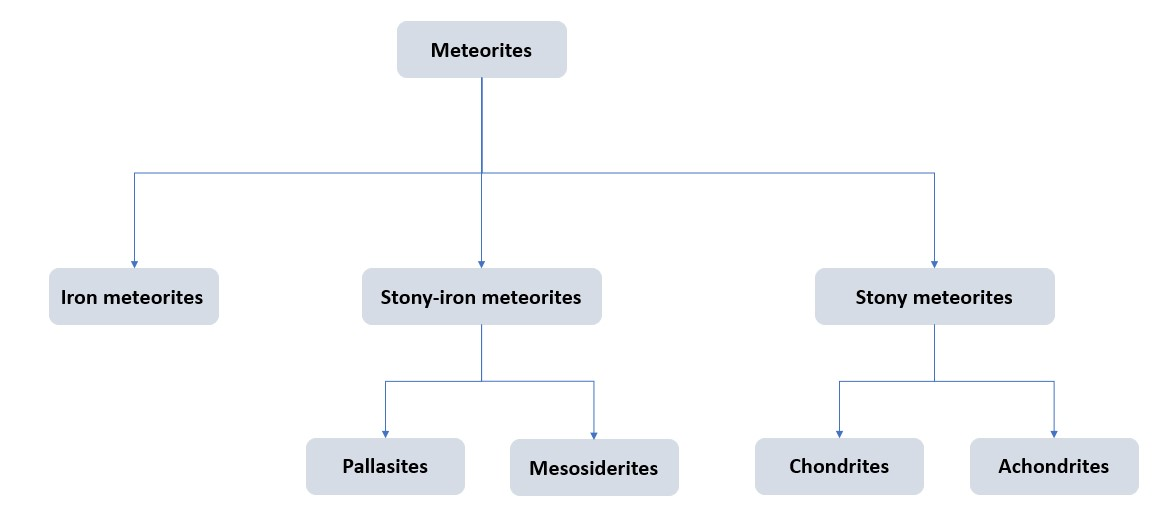

There are subtypes for each of these types. For example, Chondrites are divided into various subtypes such as H,L, etc. based on various physical and chemical characteristics. Read this resource to understand the classification of Chondrites - https://en.wikipedia.org/wiki/Chondrite#Chondrite_classification. Subgroups of Pallasites include PM5,PES,PPX, etc. To know more about pallasites, refer to this resource - https://en.wikipedia.org/wiki/Pallasite. Here is one on Mesosiderites -https://web.archive.org/web/20100510021536/http://www4.nau.edu/meteorite/Meteorite/Mesosiderites.html. Here is a reference to Achondrites - https://en.wikipedia.org/wiki/Achondrite. Let's delve into the dataset and the analysis to learn more. 

## Data Visualization & Analysis

## What are the meteorites that fall frequently?

GridDB supports most SQL aggregation and Window functions. To know more, refer to <a href = "https://docs.griddb.net/sqlreference/sql-commands-supported/#list-of-functions"> this resource. </a>

In [4]:
#construct the sql query to be used
sql_query1 = (f"""SELECT recclass,count(*) FROM Meteorite_Landings GROUP BY 1 HAVING count(*) >500 ORDER BY 2 desc""")

In [5]:
#Setup the URL to be used to invoke the GridDB WebAPI to retrieve data from the container
url = base_url + 'sql'

#Construct the request body
request_body = '[{"type":"sql-select", "stmt":"'+sql_query1+'"}]'

#Validate the constructed request body
request_body

'[{"type":"sql-select", "stmt":"SELECT recclass,count(*) FROM Meteorite_Landings GROUP BY 1 HAVING count(*) >500 ORDER BY 2 desc"}]'

In [ ]:
#Invoke the GridDB WebAPI
data_req1 = requests.post(url, data=request_body, headers=header_obj)

In [7]:
#Process the response received and construct a Pandas dataframe with the data from the response
myJson = data_req1.json()
Meteorite_count = pd.DataFrame(myJson[0]["results"], columns=[myJson[0]["columns"][0]["name"], myJson[0]["columns"][1]["name"]])

In [8]:
#rename the columns in the dataframe as applicable
Meteorite_count.rename(columns={'recclass':'Recognized Classification','':'Number of Meteorites'},inplace=True)

<b> Insight(s): </b> <ul><li> As we can see, most meteorites are chondrites or stony meteorites. </li><li> Majority of the meteorites that fell are L6 and H5 meteorites. </li> <li>L6 chondrites have higher amounts of oxide and lower amounts of iron than H5 chondrites. H5 have more grains of meteoritic iron compared to L6. </li> </ul> 

## What are some stony-iron and iron meteors that have fallen to earth?

GridDB supports standard character and string operations. Refer to <a href = "https://docs.griddb.net/sqlreference/sql-commands-supported/#character-functions"> this resource </a> to learn more.

In [10]:
#construct the sql query to be used
sql_query2 = (f"""SELECT recclass,count(*) FROM Meteorite_Landings WHERE lower(recclass) like '%iron%' or lower(recclass) like '%meso%' OR lower(recclass) like '%palla%' GROUP BY 1 ORDER BY 2 desc""")

In [11]:
#Setup the URL to be used to invoke the GridDB WebAPI to retrieve data from the container
url = base_url + 'sql'

#Construct the request body
request_body = '[{"type":"sql-select", "stmt":"'+sql_query2+'"}]'

#Validate the constructed request body
request_body

'[{"type":"sql-select", "stmt":"SELECT recclass,count(*) FROM Meteorite_Landings WHERE lower(recclass) like \'%iron%\' or lower(recclass) like \'%meso%\' OR lower(recclass) like \'%palla%\' GROUP BY 1 ORDER BY 2 desc"}]'

In [ ]:
#Invoke the GridDB WebAPI
data_req2 = requests.post(url, data=request_body, headers=header_obj)

In [13]:
#Process the response received and construct a Pandas dataframe with the data from the response
myJson = data_req2.json()
Iron_Meteorites_count = pd.DataFrame(myJson[0]["results"], columns=[myJson[0]["columns"][0]["name"], myJson[0]["columns"][1]["name"]])

In [14]:
#rename the columns in the dataframe as needed
Iron_Meteorites_count.rename(columns={'recclass':'Stony Iron and Iron Meteorites','':'Number of Meteorites'},inplace=True)

In [15]:
#calculate the number of meteorites by group
Iron_Meteorites_summary = Iron_Meteorites_count.groupby(['Stony Iron and Iron Meteorites'])['Number of Meteorites'].sum()
Iron_Meteorites_summary.loc['Grand Total'] = Iron_Meteorites_summary.sum()
Iron_Meteorites_summary = Iron_Meteorites_summary.reset_index()

In [16]:
fig = ff.create_table(Iron_Meteorites_summary)
fig.show()

<b> Insights  </b> <ul><li>Among stony-iron and iron meteorites, we see that a total of 1351 stony-iron and iron meteorites have hit the earth!</li><li>Of these, there have been 285 Iron IIIAB meteorite falls.</li><li> Around 150 of them are different grades of Mesosiderites and around 100 of them are Pallasites.</ul>

## How many Valid and Relict meteorites have landed on earth? 

Relict Meteorites are those that have lost mass after landing on earth, due to various conditions like erosion, weathering, etc. Valid Meteorites are those that have retained their mass after landing on earth. 

In [17]:
#construct the sql query to be used
sql_query3 = (f"""SELECT CASE WHEN nametype = '' THEN 'Unknown' ELSE nametype END as nametype,count(nametype) FROM Meteorite_Landings group by 1""")

In [18]:
#Setup the URL to be used to invoke the GridDB WebAPI to retrieve data from the container
url = base_url + 'sql'

#Construct the request body
request_body = '[{"type":"sql-select", "stmt":"'+sql_query3+'"}]'

#Validate the constructed request body
request_body

'[{"type":"sql-select", "stmt":"SELECT CASE WHEN nametype = \'\' THEN \'Unknown\' ELSE nametype END as nametype,count(nametype) FROM Meteorite_Landings group by 1"}]'

In [ ]:
#Invoke the GridDB WebAPI
data_req3 = requests.post(url, data=request_body, headers=header_obj)

In [20]:
#Process the response received and construct a Pandas dataframe with the data from the response
myJson = data_req3.json()
Valid_and_Relict_Meteors = pd.DataFrame(myJson[0]["results"], columns=[myJson[0]["columns"][0]["name"], myJson[0]["columns"][1]["name"]])

In [21]:
#rename the column as applicable
Valid_and_Relict_Meteors.rename(columns={'':'count'},inplace=True)

<b> Insight(s): </b> Majority of the meteorites that fall are valid meteorites whereas less than 1% are relict. This means that most Meteorites retain their mass after landing on earth whereas less than 1% lose their mass due to various conditions on earth like erosion and weathering (relict).  

## How many meteorites were discovered immediately after hitting the ground and how many were found later? 

In [23]:
#construct the sql query to be used
sql_query4 = (f"""SELECT fall,count(fall) FROM Meteorite_Landings group by 1""")

In [24]:
#Setup the URL to be used to invoke the GridDB WebAPI to retrieve data from the container
url = base_url + 'sql'

#Construct the request body
request_body = '[{"type":"sql-select", "stmt":"'+sql_query4+'"}]'

#Validate the constructed request body
request_body

'[{"type":"sql-select", "stmt":"SELECT fall,count(fall) FROM Meteorite_Landings group by 1"}]'

In [ ]:
#Invoke the GridDB WebAPI
data_req4 = requests.post(url, data=request_body, headers=header_obj)

In [26]:
#Process the response received and construct a Pandas dataframe with the data from the response
myJson = data_req4.json()
Fell_and_found_meteors = pd.DataFrame(myJson[0]["results"], columns=[myJson[0]["columns"][0]["name"], myJson[0]["columns"][1]["name"]])

In [27]:
#rename the columns as applicable
Fell_and_found_meteors.rename(columns={'fall':'status','':'count'},inplace=True)

<b> Insight(s): </b> While majority of the meteorites were found after they fell, 1107 meteorites' fall was predicted prior to the fall.

## What were some trends of meteorites by year?

In [29]:
#construct the sql query to be used
sql_query5 = (f"""SELECT Year,count(*) as Num_Meteorites FROM Meteorite_Landings group by 1""")

In [30]:
#Setup the URL to be used to invoke the GridDB WebAPI to retrieve data from the container
url = base_url + 'sql'

#Construct the request body
request_body = '[{"type":"sql-select", "stmt":"'+sql_query5+'"}]'

#Validate the constructed request body
request_body

'[{"type":"sql-select", "stmt":"SELECT Year,count(*) as Num_Meteorites FROM Meteorite_Landings group by 1"}]'

In [ ]:
#Invoke the GridDB WebAPI
data_req5 = requests.post(url, data=request_body, headers=header_obj)

#Process the response received and construct a Pandas dataframe with the data from the response
myJson = data_req5.json()
Meteorite_Trends = pd.DataFrame(myJson[0]["results"], columns=[myJson[0]["columns"][0]["name"], myJson[0]["columns"][1]["name"]])

In [32]:
#fix data issues as a year is not always recorded for each meteorite
#Meteorite_Trends['Year'].unique()
Meteorite_Trends['year'].replace('Uknown Year','0',inplace=True)
Meteorite_Trends['year'].replace(np.nan,'0',regex=True,inplace=True) 
Meteorite_Trends['year'].fillna("",inplace=True)
Meteorite_Trends['year'].replace("None",'',inplace=True)

In [33]:
pd.to_numeric(Meteorite_Trends['year']) #['Year'].astype(int)
Meteorite_Trends['year'] = Meteorite_Trends['year'].astype(str).apply(lambda x: x.replace('.0',''))
Meteorite_Trends = Meteorite_Trends.sort_values(by='year')

Note that the meteorites whose year of fall is unknown have been excluded.

In [34]:
#exclude rows that dont have recorded year
Meteorite_Trends_known_years =  Meteorite_Trends[Meteorite_Trends['year']!='']

<b> Insight(s): </b> <ul> We see very interesting trends here - <li> Between 1399 and 1833, on an average, around 1-2 meteorites were discovered per year. <li>Between 1834 and 1874, around 3-7 meteorites that fell were discovered per year on an average. </li> <li> Between 1875 and 1929, between 7 and 20 meteorites were discovered per year on average. </li><li>There was a significant bump in the number of meteorites discovered between 1936 and 1940. Specifically in 1937, 54 meteorites were discovered whereas in 1938, 45 meteorites were discovered.</li><li> In the 1960s, a minimum of 20 and a maximum of 50 meteorites that fell were discovered.</li> <li> Post 1974, the numbers rose to the 300s and 400s (between 1974 and 1992). </li><li>Between 1993 and 2008, an average of more than 900 Meteorites that fell per year were discovered.</li> <li>Some milestone years when an exceedingly high number of meteorites were discovered include 1979, 1988, 2002, 2003 2006, 1998,1979, 2003 when between 2000 and 3000 meteorites were discovered.</li><li>This can also mean that during some years, the earth saw an increased number of meteorite falls.</li> 

## What does the geographical distribution of meteorite falls look like? 

In [36]:
#construct the sql query to be used
sql_query6 = (f"""SELECT recclass,GeoLocation, count(fall) as Num_Meteorites FROM Meteorite_Landings GROUP BY 1,2""")

In [37]:
#Setup the URL to be used to invoke the GridDB WebAPI to retrieve data from the container
url = base_url + 'sql'

#Construct the request body
request_body = '[{"type":"sql-select", "stmt":"'+sql_query6+'"}]'

#Validate the constructed request body
request_body

'[{"type":"sql-select", "stmt":"SELECT recclass,GeoLocation, count(fall) as Num_Meteorites FROM Meteorite_Landings GROUP BY 1,2"}]'

In [ ]:
#Invoke the GridDB WebAPI
data_req6 = requests.post(url, data=request_body, headers=header_obj)

#Process the response received and construct a Pandas dataframe with the data from the response
myJson = data_req6.json()
Meteorites_geo_dist = pd.DataFrame(myJson[0]["results"], columns=[myJson[0]["columns"][0]["name"], myJson[0]["columns"][1]["name"],myJson[0]["columns"][2]["name"]])

In [39]:
#rename the column in the dataframe as applicable
Meteorites_geo_dist.rename(columns={'':'count'},inplace=True)

Note that data that does not have a valid location have been excluded

In [40]:
Meteorites_geo_dist['GeoLocation'].fillna("",inplace=True)

In [41]:
#exclude records that dont have a geo location captured
Meteorites_geo_dist_known_locations = Meteorites_geo_dist[Meteorites_geo_dist['GeoLocation']!='']

In [42]:
#split the geo location into 2 fields -Latitude and Longitude
Meteorites_geo_dist_known_locations[['Latitude', 'Longitude']] = Meteorites_geo_dist['GeoLocation'].str.strip('()').str.split(', ', expand=True).rename(columns={0:'Latitude', 1:'Longitude'})

In [43]:
Meteorites_geo_dist_known_locations['Latitude'] = pd.to_numeric(Meteorites_geo_dist_known_locations['Latitude'])
Meteorites_geo_dist_known_locations['Longitude'] = pd.to_numeric(Meteorites_geo_dist_known_locations['Longitude'])

Meteorites_geo_dist_known_locations

<b> Insight(s): </b> This is the beautiful distribution of meteorite falls across the world. Here are some insights - <ul> <li>North America and Europe, Australia and Oceania have a large number of meteorite falls over the years. </li> <li>In Asia, India has had a large number of meteorite falls too.</li> <li>Meteorites also seem to be concentrated in the central part of South America, particularly in Argentina, the east of Brazil, along the coast, and the south of Peru. </li> <li>In the Far east, especially in Japan, we see a large number of meteorite falls.</li><li>Interestingly, in China, all the populated cities like Shanghai, Guanzhou, etc. have a large number of meteorite sightings.</li>

## What were some of the heaviest meteorite falls?

GridDB supports null handling and subqueries. Read these resources to know more - <a href = 'https://docs.griddb.net/sqlreference/sql-commands-supported/#list-of-operators'> GridDB Operators</a> and <a href='https://docs.griddb.net/latest/sqlreference/sql-commands-supported/#case'> GridDB Subqueries. </a>

In [45]:
#construct the sql query to be used
sql_query7 = (f"""SELECT * FROM (SELECT name,mass FROM Meteorite_Landings WHERE mass IS NOT null order by mass desc) t1 LIMIT 10""")

In [46]:
#Setup the URL to be used to invoke the GridDB WebAPI to retrieve data from the container
url = base_url + 'sql'

#Construct the request body
request_body = '[{"type":"sql-select", "stmt":"'+sql_query7+'"}]'

#Validate the constructed request body
request_body

'[{"type":"sql-select", "stmt":"SELECT * FROM (SELECT name,mass FROM Meteorite_Landings WHERE mass IS NOT null order by mass desc) t1 LIMIT 10"}]'

In [ ]:
#Invoke the GridDB WebAPI
data_req7 = requests.post(url, data=request_body, headers=header_obj)

In [48]:
#Process the response received and construct a Pandas dataframe with the data from the response
myJson = data_req7.json()
Heaviest_Meteors = pd.DataFrame(myJson[0]["results"], columns=[myJson[0]["columns"][0]["name"], myJson[0]["columns"][1]["name"]])

<b> Insight(s): </b> The top 10 heavy meteorites are Hoba, Cape York, Campo del Cielo and so on. <ul><li> Hoba, being the heaviest meteorite to fall (in the whole world) weighed 60 tonnes (60,000 kg) when it fell to the ground.</li><li> The next heaviest is Cape York which weighed 58 tonnes (58.200 kg) when it fell.

## What was the geographical location of Pallasites that fell to the earth?

Pallasites are interesting meteorites that contain shimmering olive-green crystals which is mostly caused by magnesium-iron silicate embedded within the meteorite. These meteorites are metallic in nature.

In [50]:
#construct the sql query to be used
sql_query8 = (f"""SELECT Geolocation,count(fall) FROM Meteorite_Landings where recclass like '%Pallasite%' group by 1""")

In [51]:
#Setup the URL to be used to invoke the GridDB WebAPI to retrieve data from the container
url = base_url + 'sql'

#Construct the request body
request_body = '[{"type":"sql-select", "stmt":"'+sql_query8+'"}]'

#Validate the constructed request body
request_body

'[{"type":"sql-select", "stmt":"SELECT Geolocation,count(fall) FROM Meteorite_Landings where recclass like \'%Pallasite%\' group by 1"}]'

In [ ]:
#Invoke the GridDB WebAPI
data_req8 = requests.post(url, data=request_body, headers=header_obj)

#Process the response received and construct a Pandas dataframe with the data from the response
myJson = data_req8.json()
Pallasites = pd.DataFrame(myJson[0]["results"], columns=[myJson[0]["columns"][0]["name"], myJson[0]["columns"][1]["name"]])

In [53]:
#rename the column as applicable
Pallasites.rename(columns={'':'count'},inplace=True)

In [54]:
#create a copy of the dataframe
Pallasites_with_total = Pallasites.copy()

In [55]:
Pallasites_with_total['GeoLocation'].fillna('Unknown',inplace=True)

In [56]:
#sum by geo location
Pallasites_with_total = Pallasites_with_total.groupby(['GeoLocation'])['count'].sum()
Pallasites_with_total.loc['Grand Total'] = Pallasites_with_total.sum()
Pallasites_with_total = Pallasites_with_total.reset_index()

In [57]:
pd.set_option('display.max_colwidth', 1)
display(Pallasites_with_total)

,GeoLocation,count
0,"(-10.75, -39.21667)",1
1,"(-22.36667, 135.76667)",1
2,"(-24.20333, -68.80667)",1
3,"(-26.26667, 18.18333)",1
4,"(-31.16667, 125.26667)",1
...,...,...
63,"(62.9, 152.43333)",1
64,"(64.02, 161.80833)",1
65,"(70.0, 24.0)",1
66,Unknown,23


A total of 94 pallasites have fallen to the earth so far. Of these, 23 pallasites do not seem to have a geolocation. Hence, these will have to be filtered out. 

In [58]:
#replace all Nan
Pallasites['GeoLocation'].fillna("",inplace=True)

#exclude entries that are missing a geo location
Pallasites_known_locations = Pallasites[Pallasites['GeoLocation']!='']

#extract the latitude and longitude from the geo location
Pallasites_known_locations[['Latitude', 'Longitude']] = Pallasites['GeoLocation'].str.strip('()').str.split(', ', expand=True).rename(columns={0:'Latitude', 1:'Longitude'})

#convert to numeric
Pallasites_known_locations['Latitude'] = pd.to_numeric(Pallasites_known_locations['Latitude'])
Pallasites_known_locations['Longitude'] = pd.to_numeric(Pallasites_known_locations['Longitude'])

<b>Insight(s):</b> <ul> <li> There have been multiple pallasite falls in North America. </li>
    <li>There have been 2 pallasite falls in Chile and 1 in Brazil within South America. </li>
    <li>Almost every continent has had a few pallasite falls. </li>
    <li>Some parts of Europe and Russia have had a few falls. </li>
    <li>India and Japan have had one pallasite fall each. </li>
    <li>There has been 4 pallasite falls in Australia and Oceania. </li>

## Concluding Remarks

We used GridDB and its powerful query engine to analyze and extract interesting insights around Meteorite falls. While analyzing the results, we also learnt about some querying capabilities of GridDB. This article was meant to illustrate how to load data into GridDB using the WebAPI, and to query and analyze the results using Python in an effortless manner. 